# imports

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import itertools

from tensorflow import keras
from tensorflow.keras import layers
from google.colab.patches import cv2_imshow
from keras.utils import np_utils
from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from keras.models import load_model


In [94]:
# Import MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data Checks

In [95]:
# Data check
print(x_train.shape)
print ("Initial shape & Dimension of x_train:", str(x_train.shape))
print ("Number of samples in our training data:", str(len(x_train)))
print ("Number of lables in our training data:", str(len(x_test)))
print("Number of samples in test data:"+ str(len(x_test)))
print("Number of labels in the test data:"+str(len(y_test)))

(60000, 28, 28)
Initial shape & Dimension of x_train: (60000, 28, 28)
Number of samples in our training data: 60000
Number of lables in our training data: 10000
Number of samples in test data:10000
Number of labels in the test data:10000


In [96]:
for i in range(0,6):
 random_num = np.random.randint(0, len(x_train))
 img = x_train[random_num]
 cv2_imshow(img)
 cv2.waitKey()
cv2.destroyAllWindows()


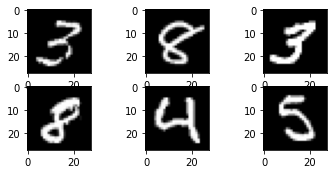

In [97]:
#Checking images using matplotlib

plt.subplot(334)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(335)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(336)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(337)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(338)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.subplot(339)
random_num = np.random.randint(0,len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))
plt.show()

# Transformations

## Reshape for keras

In [98]:
img_rows = x_train[0].shape[0]
img_cols = x_train[1].shape[0]
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalization

In [99]:
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## One-hot encoding

In [100]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print ("Number of classes: " + str(y_test.shape[1]))
num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]
y_train[0]

Number of classes: 10


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Build Model

## Design

In [101]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(10, kernel_size=(3,3), activation = 'relu', input_shape = input_shape))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

## Compile and Train

In [102]:
model.compile(loss ="categorical_crossentropy", optimizer= 'SGD', metrics =['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 64)        5824      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               1179776   
                                                      

In [103]:
batch_size = 32
epochs = 6
history = model.fit(x_train,
y_train,
batch_size= batch_size,
epochs = epochs,
verbose=1,
validation_data= (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test_loss:', score[0])
print('Test_accuracy:', score[1])

Epoch 1/6
1875/1875 [==============================] - 92s 49ms/step - loss: 0.5889 - accuracy: 0.8158 - val_loss: 0.2034 - val_accuracy: 0.9421
Epoch 2/6
1875/1875 [==============================] - 96s 51ms/step - loss: 0.3014 - accuracy: 0.9095 - val_loss: 0.1439 - val_accuracy: 0.9560
Epoch 3/6
1875/1875 [==============================] - 92s 49ms/step - loss: 0.2282 - accuracy: 0.9315 - val_loss: 0.1095 - val_accuracy: 0.9671
Epoch 4/6
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1785 - accuracy: 0.9462 - val_loss: 0.0841 - val_accuracy: 0.9738
Epoch 5/6
1875/1875 [==============================] - 91s 49ms/step - loss: 0.1439 - accuracy: 0.9567 - val_loss: 0.0707 - val_accuracy: 0.9771
Epoch 6/6
1875/1875 [==============================] - 93s 49ms/step - loss: 0.1245 - accuracy: 0.9622 - val_loss: 0.0609 - val_accuracy: 0.9805
Test_loss: 0.06086544692516327
Test_accuracy: 0.9804999828338623


# Analysis

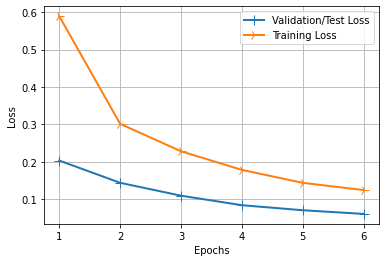

In [104]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_loss_values, label = 'Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label= 'Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

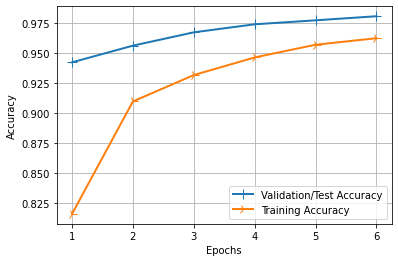

In [105]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values)+ 1)
line1 = plt.plot(epochs, val_acc_values, label = 'Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label= 'Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker= '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Visualize model

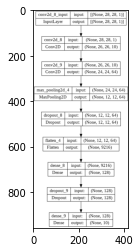

In [106]:
%matplotlib inline
plot_model(model, to_file='model.png', show_shapes= True, show_layer_names = True)
img = mpimg.imread('model.png')
plt.imshow(img)
plt.show()

## Validate performance

In [107]:
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

313/313 [==============================] - 4s 13ms/step


array([[ 970,    0,    1,    0,    0,    1,    4,    1,    3,    0],
       [   0, 1125,    2,    1,    0,    0,    5,    0,    2,    0],
       [   4,    5, 1005,    4,    2,    0,    2,    7,    3,    0],
       [   0,    0,    2,  994,    0,    6,    0,    4,    3,    1],
       [   0,    2,    2,    0,  968,    0,    4,    0,    2,    4],
       [   2,    0,    0,    4,    0,  878,    3,    1,    4,    0],
       [   5,    2,    0,    0,    2,    4,  944,    0,    1,    0],
       [   2,    3,   11,    3,    0,    0,    0, 1006,    1,    2],
       [   2,    1,    2,    8,    3,    2,    5,    3,  945,    3],
       [   4,    7,    0,    8,    8,    2,    0,    8,    2,  970]])